In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'dffc9d8a-03b6-481f-8965-924c30ff69a8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [6]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 100)

In [19]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head(10)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973511e+07,19735112,False,NaN,1,NaN,NaN,NaN,2024-08-03T18:40:00.000Z,60234.007829,3.516174e+10,-16.4634,-0.684421,-4.274122,-12.594011,3.435922,-15.063939,-5.908288,1.188725e+12,55.7081,1.264914e+12,NaN,2024-08-03T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 22:01:32.500901
1,1027,Ethereum,ETH,ethereum,9185,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202552e+08,120255176.296015,True,NaN,2,NaN,NaN,NaN,2024-08-03T18:39:00.000Z,2903.636602,1.841498e+10,-9.9162,-0.209181,-3.688317,-11.168240,-7.444047,-23.980346,-7.513938,3.491773e+11,16.3372,3.491773e+11,NaN,2024-08-03T18:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 22:01:32.500901
2,825,Tether USDt,USDT,tether,93464,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.145427e+11,117068083203.710236,True,NaN,3,NaN,NaN,NaN,2024-08-03T18:39:00.000Z,0.999355,6.445053e+10,-3.4026,-0.012907,0.012282,-0.082599,-0.000086,-0.060398,-0.086692,1.144688e+11,5.3644,1.169925e+11,NaN,2024-08-03T18:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-03 22:01:32.500901
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459372e+08,145937193.070782,False,NaN,4,NaN,NaN,NaN,2024-08-03T18:39:00.000Z,526.743407,1.932509e+09,-4.5055,-0.201331,-5.466776,-9.947403,0.438494,-21.286953,-10.945934,7.687145e+10,3.6025,7.687145e+10,NaN,2024-08-03T18:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 22:01:32.500901
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.653853e+08,581498992.531633,True,NaN,5,NaN,NaN,NaN,2024-08-03T18:39:00.000Z,141.822820,3.937860e+09,-9.2028,-0.594675,-7.987767,-22.028330,5.295521,-16.479652,-2.897438,6.600226e+10,3.0931,8.246983e+10,NaN,2024-08-03T18:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 22:01:32.500901
5,3408,USDC,USDC,usd-coin,21300,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.307152e+10,33071520877.412941,False,NaN,6,NaN,NaN,NaN,2024-08-03T18:39:00.000Z,1.000038,6.494532e+09,-19.1393,0.004101,-0.011504,0.007683,0.002098,0.007683,-0.005042,3.307277e+10,1.5499,3.307277e+10,NaN,2024-08-03T18:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-03 22:01:32.500901
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,99987385748,False,NaN,7,NaN,NaN,NaN,2024-08-03T18:40:00.000Z,0.549417,1.376220e+09,-26.5158,-0.465944,-2.535687,-8.048558,25.498596,4.418842,3.705779,3.076696e+10,1.4419,5.494169e+10,NaN,2024-08-03T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 22:01:32.500901
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.453849e+11,145384916383.705139,True,NaN,8,NaN,NaN,NaN,2024-08-03T18:40:00.000Z,0.107164,8.138030e+08,-1.8769,-0.378041,-5.112527,-19.489884,-0.694974,-33.740351,-33.706072,1.558005e+10,0.7301,1.558005e+10,NaN,2024-08-03T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 22:01:32.500901
8,11419,Toncoin,TON,toncoin,487,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, 

Automating the Data Pull

In [42]:
df_new = pd.DataFrame()
def api_runner():
  global df_new
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'dffc9d8a-03b6-481f-8965-924c30ff69a8',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
  
  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  df_append = pd.DataFrame(df2)
  df_new = pd.concat([df_new,df_append])
  
  # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\ozsam\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\ozsam\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\ozsam\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\ozsam\OneDrive\Documents\Python Scripts\API.csv')


In [43]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()


{'status': {'timestamp': '2024-08-03T19:13:30.818Z', 'error_code': 0, 'error_message': None, 'elapsed': 10, 'credit_count': 1, 'notice': None, 'total_count': 10078}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11621, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [47]:
df_new.shape

(90, 37)

Transforming and Cleaning Data

In [48]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [51]:
df3 = df_new.groupby('name', sort = False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()

In [52]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.49615,-3.99951,-11.92036,3.34290,-14.73955,-5.90809
Ethereum,-0.09017,-3.49842,-10.39833,-7.44160,-23.66668,-7.50831
Tether USDt,-0.00560,0.02820,-0.09369,-0.00475,-0.08460,-0.08987
BNB,-0.04984,-5.01088,-9.51913,0.35457,-21.02865,-10.97030
Solana,-0.09621,-6.83551,-21.20588,5.37801,-16.13839,-3.09872
USDC,-0.00877,-0.00547,-0.00617,-0.00768,-0.01324,-0.01061
XRP,-0.12121,-1.87583,-6.98349,24.78045,4.83332,3.84839
Dogecoin,-0.71347,-5.07657,-19.76344,-1.42948,-33.69332,-34.37909
Toncoin,0.03311,-8.26518,-12.05292,-18.48644,-16.45453,-0.37138


In [70]:
df4 = df3.stack()
df4 = df4.to_frame(name = 'values')
df5 = df4.reset_index()
df6 = df5.rename(columns={"level_1" : 'percent_change'})

In [71]:
df6['time_period'] = df6['percent_change'].apply(lambda x: x.split('_')[-1])

Some basic visualizing

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

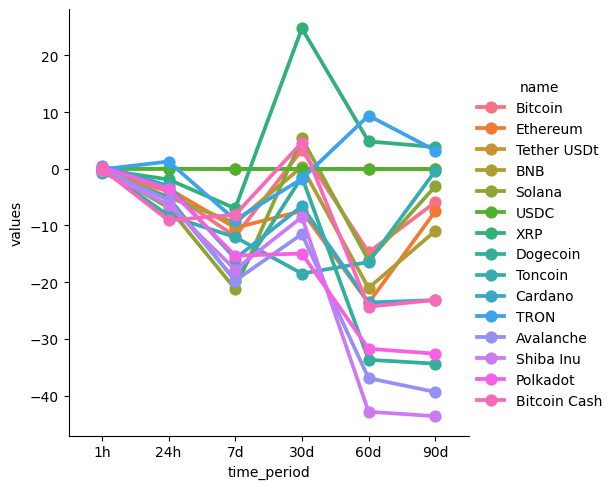

In [73]:
sns.catplot(x = "time_period", y = 'values', hue = 'name', data = df6, kind = 'point')